Final Project Submission

Please fill out:
* Student name: Kieu Cheung
* Student pace: full time
* Scheduled project review date/time: Jun 22nd, 2020
* Instructor name: Abhineet Kulkami
* Blog post URL:


# Raw Data

In [489]:
import pandas as pd
import os

from bs4 import BeautifulSoup 
import requests 

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [490]:
pwd

'/Users/kieuha/Desktop/Flatiron/dsc-mod-1-project-v2-1-onl01-dtsc-ft-012120'

In [491]:
df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [492]:
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [493]:
from glob import glob

In [494]:
csv_files = glob("./zippedData/*.csv.gz")
csv_files

['./zippedData/imdb.title.crew.csv.gz',
 './zippedData/tmdb.movies.csv.gz',
 './zippedData/imdb.title.akas.csv.gz',
 './zippedData/imdb.title.ratings.csv.gz',
 './zippedData/imdb.name.basics.csv.gz',
 './zippedData/imdb.title.basics.csv.gz',
 './zippedData/tn.movie_budgets.csv.gz',
 './zippedData/bom.movie_gross.csv.gz',
 './zippedData/imdb.title.principals.csv.gz']

In [495]:
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv.gz", "").replace(".", "_") # cleaning the filenames
    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df

## Table Column Information

In [496]:
df_imdb_title_crew = csv_files_dict["imdb_title_crew"]
df_imdb_title_crew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0285252 to tt9010172
Data columns (total 2 columns):
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(2)
memory usage: 3.3+ MB


In [497]:
df_tmdb_movies = csv_files_dict["tmdb_movies"]
df_tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [498]:
df_imdb_title_akas = csv_files_dict["imdb_title_akas"]
df_imdb_title_akas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331703 entries, tt0369610 to tt9880178
Data columns (total 7 columns):
ordering             331703 non-null int64
title                331703 non-null object
region               278410 non-null object
language             41715 non-null object
types                168447 non-null object
attributes           14925 non-null object
is_original_title    331678 non-null float64
dtypes: float64(1), int64(1), object(5)
memory usage: 20.2+ MB


In [499]:
df_imdb_title_ratings = csv_files_dict["imdb_title_ratings"]
df_imdb_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt10356526 to tt9894098
Data columns (total 2 columns):
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1)
memory usage: 1.7+ MB


In [500]:
df_imdb_name_basics = csv_files_dict["imdb_name_basics"]
df_imdb_name_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 606648 entries, nm0061671 to nm9993380
Data columns (total 5 columns):
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(3)
memory usage: 27.8+ MB


In [501]:
df_imdb_title_basics = csv_files_dict["imdb_title_basics"]
df_imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


In [502]:
df_tn_movie_budgets = csv_files_dict["tn_movie_budgets"].copy()

# Replace commas and $ from the string representation of the dollars
# and convert the string number to a float.
df_tn_movie_budgets[df_tn_movie_budgets.columns[2:]] = \
      df_tn_movie_budgets[df_tn_movie_budgets.columns[2:]].\
replace('[\$,]', '',regex=True).astype(float)

df_tn_movie_budgets["production_budget"] = \
            df_tn_movie_budgets["production_budget"]/1000000.

df_tn_movie_budgets["domestic_gross"] = \
            df_tn_movie_budgets["domestic_gross"]/1000000.

df_tn_movie_budgets["worldwide_gross"] = \
            df_tn_movie_budgets["worldwide_gross"]/1000000.

df_tn_movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425.0,760.507625,2776.345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410.6,241.063875,1045.663875
3,"Jun 7, 2019",Dark Phoenix,350.0,42.762350,149.762350
4,"May 1, 2015",Avengers: Age of Ultron,330.6,459.005868,1403.013963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317.0,620.181382,1316.721747


In [503]:
df_bom_movie_gross = csv_files_dict["bom_movie_gross"]
df_bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


In [504]:
df_imdb_title_principals = csv_files_dict["imdb_title_principals"]
df_imdb_title_principals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028186 entries, tt0111414 to tt9692684
Data columns (total 5 columns):
ordering      1028186 non-null int64
nconst        1028186 non-null object
category      1028186 non-null object
job           177684 non-null object
characters    393360 non-null object
dtypes: int64(1), object(4)
memory usage: 47.1+ MB


## SQL

In [505]:
import sqlite3

In [506]:
conn = sqlite3.connect("movies_db.sqlite")

In [507]:
def create_sql_table_from_df(df, name, conn):
    try:
        df.to_sql(name, conn)
        print(f"Created table {name}")
    
    except Exception as e:
        print(f"could not make table {name}")
        print(e)

In [508]:

conn.execute("select name from sqlite_master where type='table';").fetchall()

[('imdb_title_crew',),
 ('tmdb_movies',),
 ('imdb_title_akas',),
 ('imdb_title_ratings',),
 ('imdb_name_basics',),
 ('imdb_title_basics',),
 ('tn_movie_budgets',),
 ('bom_movie_gross',),
 ('imdb_title_principals',)]

# Data Exploration

   ## Content of Each Table

In [509]:
#conn.execute("SELECT * FROM imdb_title_crew_gz LIMIT 10;").fetchall()
for table in csv_files_dict :
    print("table: {}".format(table))
    print("\n")
    print(csv_files_dict[table].head())
    print("\n\n#########################\n\n")

table: imdb_title_crew


                               directors              writers
tconst                                                       
tt0285252                      nm0899854            nm0899854
tt0438973                            NaN  nm0175726,nm1802864
tt0462036                      nm1940585            nm1940585
tt0835418                      nm0151540  nm0310087,nm0841532
tt0878654  nm0089502,nm2291498,nm2292011            nm0284943


#########################


table: tmdb_movies


             genre_ids     id original_language  \
0      [12, 14, 10751]  12444                en   
1  [14, 12, 16, 10751]  10191                en   
2        [12, 28, 878]  10138                en   
3      [16, 35, 10751]    862                en   
4        [28, 878, 12]  27205                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to T

### File Data Information

In [510]:
for item in csv_files_dict.items():
        print("===============New DF===============")
        print(item[0])
        print(item[1].info())
        print("================End DF===============")

===============New DF===============
imdb_title_crew
<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0285252 to tt9010172
Data columns (total 2 columns):
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(2)
memory usage: 3.3+ MB
None
================End DF===============
===============New DF===============
tmdb_movies
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB
None
================End DF===============
===============New DF======

## Scatter Plots of Popularity, Vote_Average, Vote_Count 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3dfbfc278>,
      dtype=object)

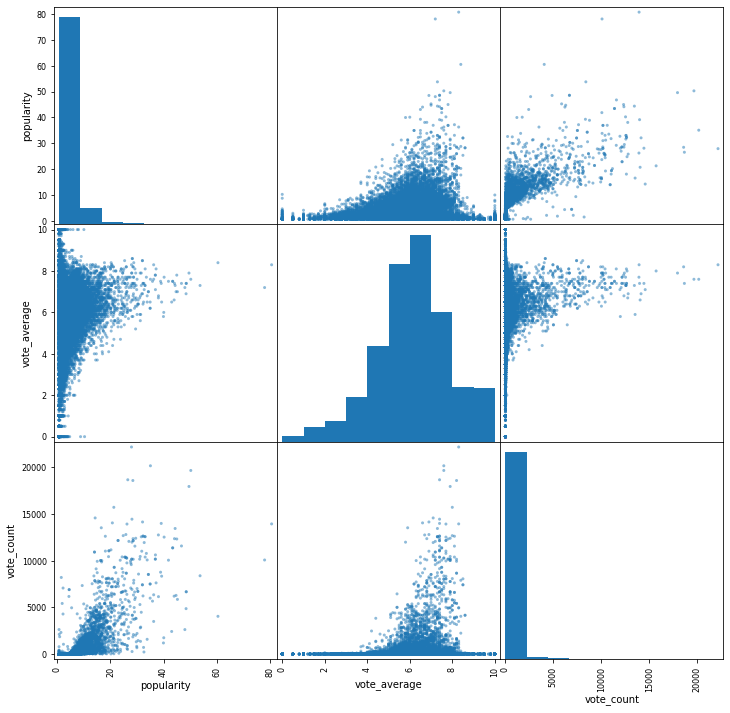

In [511]:
df_tmdb_movies = csv_files_dict["tmdb_movies"]
df = df_tmdb_movies[["popularity", "vote_average", "vote_count"]]
pd.plotting.scatter_matrix(df, figsize=[12, 12])

In [512]:
# TO BE DELETED 
df_tmdb_movies[["original_language", "popularity", "vote_average", "vote_count"]] \
              .groupby(["original_language"])  \
              .mean().sort_values(by = "vote_count", ascending = False) \
              .head(10)

,popularity,vote_average,vote_count
original_language,,,
nb,8.221000,6.700000,806.000000
id,5.187000,6.561538,276.538462
en,3.086821,5.953458,209.307887
ja,5.711072,6.826792,206.694340
da,4.630407,6.529630,156.537037
fr,4.251625,6.175148,148.593688
sv,4.799897,6.710294,143.029412
it,3.116618,6.253659,140.105691
sr,3.551857,5.814286,129.142857


## Data Cleaning

In [513]:
df_tn_movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425.0,760.507625,2776.345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410.6,241.063875,1045.663875
3,"Jun 7, 2019",Dark Phoenix,350.0,42.762350,149.762350
4,"May 1, 2015",Avengers: Age of Ultron,330.6,459.005868,1403.013963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317.0,620.181382,1316.721747


### Convert String Dollars to Float

### Data Exploration

#### The Top 20 Movies by Worldwide Gross

In [514]:
df_tn_movie_budgets.sort_values(by='worldwide_gross', \
                                ascending = False).head(20)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425.0,760.507625,2776.345279
43,"Dec 19, 1997",Titanic,200.0,659.363944,2208.208395
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306.0,936.662225,2053.311220
7,"Apr 27, 2018",Avengers: Infinity War,300.0,678.815482,2048.134200
34,"Jun 12, 2015",Jurassic World,215.0,652.270625,1648.854864
67,"Apr 3, 2015",Furious 7,190.0,353.007020,1518.722794
27,"May 4, 2012",The Avengers,225.0,623.279547,1517.935897
4,"May 1, 2015",Avengers: Age of Ultron,330.6,459.005868,1403.013963
42,"Feb 16, 2018",Black Panther,200.0,700.059566,1348.258224


In [515]:
df = df_tn_movie_budgets[["production_budget","domestic_gross","worldwide_gross"]]
print(df)
#pd.plotting.scatter_matrix(df, figsize =(12, 12))

    production_budget  domestic_gross  worldwide_gross
id                                                    
1            425.0000      760.507625      2776.345279
2            410.6000      241.063875      1045.663875
3            350.0000       42.762350       149.762350
4            330.6000      459.005868      1403.013963
5            317.0000      620.181382      1316.721747
..                ...             ...              ...
78             0.0070        0.000000         0.000000
79             0.0060        0.048482         0.240495
80             0.0050        0.001338         0.001338
81             0.0014        0.000000         0.000000
82             0.0011        0.181041         0.181041

[5782 rows x 3 columns]


Note: There is a correlation between the domestic gross and worldwide gross. Movies that did well in the U.S had a tendancy to do well internationally. 

In [516]:
for key, value in csv_files_dict.items(): 
    print (key, value) 
    print("_____________________________________________________")

imdb_title_crew                                directors              writers
tconst                                                       
tt0285252                      nm0899854            nm0899854
tt0438973                            NaN  nm0175726,nm1802864
tt0462036                      nm1940585            nm1940585
tt0835418                      nm0151540  nm0310087,nm0841532
tt0878654  nm0089502,nm2291498,nm2292011            nm0284943
...                                  ...                  ...
tt8999974                     nm10122357           nm10122357
tt9001390                      nm6711477            nm6711477
tt9001494          nm10123242,nm10123248                  NaN
tt9004986                      nm4993825            nm4993825
tt9010172                            NaN            nm8352242

[146144 rows x 2 columns]
_____________________________________________________
tmdb_movies                  genre_ids      id original_language  \
0          [12, 14, 10751]   

# Data Analysis 

 ## Directors with the Most Votes

In [517]:
df_ = df_imdb_title_crew.join(df_imdb_title_ratings)
df_['directors'] = df_['directors'].str.split(',')

df_director_rating = df_.explode('directors') \
    .set_index('directors') \
    .join(df_imdb_name_basics)[['averagerating', 'numvotes', 'primary_name']] \
    .groupby('primary_name') \
    .mean().sort_values(by='numvotes', ascending=False)
df_director_rating["director_name"] = df_director_rating.index
df_director_rating = df_director_rating.reset_index().drop(columns='primary_name')

df_director_rating

,averagerating,numvotes,director_name
0,8.425000,1.248687e+06,Christopher Nolan
1,8.000000,8.208470e+05,Tim Miller
2,7.533333,6.215547e+05,Joss Whedon
3,8.225000,5.904550e+05,Anthony Russo
4,7.866667,5.725833e+05,David Fincher
...,...,...,...
106752,NaN,NaN,Úrsula Mares
106753,NaN,NaN,Ülkü Akgün
106754,NaN,NaN,Þorfinnur Guðnason
106755,NaN,NaN,Þorstein J. Vilhjálmsson


## Writers with the Most Votes

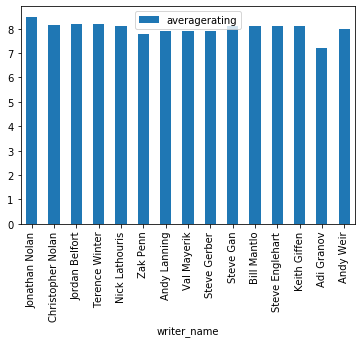

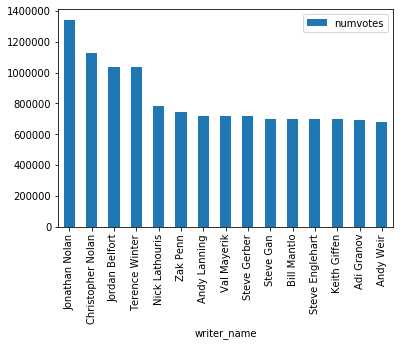

In [518]:
# imdb_title_crew has list of writers
df_ = df_imdb_title_crew.join(df_imdb_title_ratings)
df_['writers'] = df_['writers'].str.split(',')

df_writer_rating = df_.explode('writers') \
    .set_index('writers') \
    .join(df_imdb_name_basics)[['averagerating', 'numvotes', 'primary_name']] \
    .groupby('primary_name') \
    .mean().sort_values(by='numvotes', ascending=False)
df_writer_rating["writer_name"] = df_writer_rating.index
df_writer_rating = df_writer_rating.reset_index().drop(columns='primary_name')


df_writer_rating.set_index('writer_name')[['averagerating']].head(15).plot(kind='bar')

# Ratings are between 0 and 10 while numvotes can be thousands so plot each separately.
plt.show()
df_writer_rating.set_index('writer_name')[['numvotes']].head(15).plot(kind='bar')

## Genres with the Most Votes

Note: The block of code below is sorted by numvotes because how many people watch the movie is correlated with the number of votes.

Talk show will be removed from the table since there is no data available 

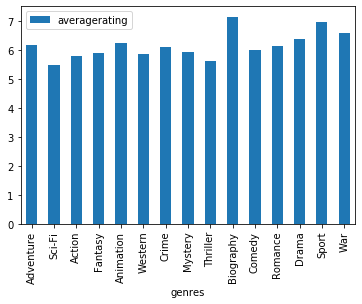

In [519]:
df_ = df_imdb_title_basics.join(df_imdb_title_ratings)

df_['genres'] = df_['genres'].str.split(',')
df_ = df_.explode('genres')

df_ = df_[['genres', 'averagerating', 'numvotes']] \
   .groupby(['genres']) \
   .mean() \
   .sort_values(by='numvotes', ascending=False)

df_[['averagerating']].head(15).plot(kind='bar')

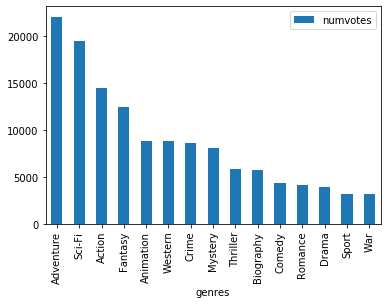

In [520]:
# Ratings are between 0 and 10 while numvotes can be thousands so plot each separately.
plt.show()
df_[['numvotes']].head(15).plot(kind='bar')

In [521]:
# num votes is correlated with popularity
df_writer_rating.head(20)

,averagerating,numvotes,writer_name
0,8.500000,1.343552e+06,Jonathan Nolan
1,8.160000,1.128407e+06,Christopher Nolan
2,8.200000,1.035358e+06,Jordan Belfort
3,8.200000,1.035358e+06,Terence Winter
4,8.100000,7.809100e+05,Nick Lathouris
5,7.800000,7.426575e+05,Zak Penn
6,7.900000,7.156555e+05,Andy Lanning
7,7.900000,7.156555e+05,Val Mayerik
8,7.900000,7.156555e+05,Steve Gerber
9,8.100000,7.007457e+05,Steve Gan


In [522]:
# num votes is correlated with popularity
df_director_rating.head(20)

,averagerating,numvotes,director_name
0,8.425000,1.248687e+06,Christopher Nolan
1,8.000000,8.208470e+05,Tim Miller
2,7.533333,6.215547e+05,Joss Whedon
3,8.225000,5.904550e+05,Anthony Russo
4,7.866667,5.725833e+05,David Fincher
5,8.200000,5.361810e+05,Ronnie Del Carmen
6,7.500000,5.169980e+05,Chris Buck
7,7.500000,5.169980e+05,Jennifer Lee
8,7.566667,5.169633e+05,J.J. Abrams
9,7.500000,4.875270e+05,Patty Jenkins


In [523]:
join_by_tconst_df = df_imdb_title_principals.join(df_imdb_name_basics, how='left')
print(join_by_tconst_df)

           ordering      nconst         category                   job  \
tt0063540        10   nm0006210         composer                   NaN   
tt0063540         1   nm0474801            actor                   NaN   
tt0063540         2   nm0904537          actress                   NaN   
tt0063540         3   nm0756379            actor                   NaN   
tt0063540         4   nm0474876            actor                   NaN   
...             ...         ...              ...                   ...   
tt9916754         5   nm9272490         director  supervising director   
tt9916754         6   nm8349149         director           co-director   
tt9916754         7   nm9272489  cinematographer                   NaN   
tt9916754         8  nm10538638  cinematographer                   NaN   
tt9916754         9  nm10538635  cinematographer                   NaN   

                                characters primary_name  birth_year  \
tt0063540                              N

 WHICH LANGUAGES TO TRANSLATED BASED the number of title
 en: English/ tr: Turkish/ bg: Bulgarian/ fr: French he: Hebrew or Herero /sv: Swedish / 
 cmn = cant find/ fa: Faroese/ hi: Hindi or Hiri Motu /yue cant find /ca: Catalan /
    es: spanish

In [524]:
top_languages = df_imdb_title_akas[['language', 'title']] \
                  .groupby(['language']) \
                  .count() \
                  .sort_values(by='title', ascending=False)
top_languages.head(10)

,title
language,
en,22895
tr,3847
bg,3609
fr,3576
he,2680
sv,965
cmn,727
fa,482
hi,307


In [525]:
#title_basics_split_genres = df_imdb_title_basics["genres"].str.split(',')
#print(title_basics_split_genres)

In [526]:
# Merge_title_rating_genres = pd.merge(title_basics_split_genres, \
                                  #   df_imdb_title_ratings, \
                                   #  how ="inner", on="tconst", copy = True)
#print(Merge_title_rating_genres)

In [527]:
df_imdb_title_crew

,directors,writers
tconst,,
tt0285252,nm0899854,nm0899854
tt0438973,NaN,"nm0175726,nm1802864"
tt0462036,nm1940585,nm1940585
tt0835418,nm0151540,"nm0310087,nm0841532"
tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...
tt8999974,nm10122357,nm10122357
tt9001390,nm6711477,nm6711477
tt9001494,"nm10123242,nm10123248",NaN


In [528]:
df_tmdb_movies

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [529]:
df_imdb_title_akas

,ordering,title,region,language,types,attributes,is_original_title
title_id,,,,,,,
tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...
tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
tt9880178,1,La atención,NaN,NaN,original,NaN,1.0


In [530]:
df_imdb_title_ratings

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21
...,...,...
tt9805820,8.1,25
tt9844256,7.5,24
tt9851050,4.7,14


In [531]:
df_imdb_name_basics

,primary_name,birth_year,death_year,primary_profession,known_for_titles
nconst,,,,,
nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...
nm9990381,Susan Grobes,NaN,NaN,actress,NaN
nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"


In [532]:
df_imdb_title_basics

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [533]:
df_bom_movie_gross

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...
The Quake,Magn.,6200.0,NaN,2018
Edward II (2018 re-release),FM,4800.0,NaN,2018
El Pacto,Sony,2500.0,NaN,2018


In [534]:
df_imdb_title_principals

,ordering,nconst,category,job,characters
tconst,,,,,
tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
tt0111414,2,nm0398271,director,NaN,NaN
tt0111414,3,nm3739909,producer,producer,NaN
tt0323808,10,nm0059247,editor,NaN,NaN
tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...
tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
tt9692684,3,nm10441594,director,NaN,NaN


## Directors, Writers and Budgets

In [535]:
# join tables together and select columns of interest to simplify
column_list = ["directors", "writers", "title", "language"]
df_movies = df_imdb_title_crew.join(df_imdb_title_akas)[column_list]

# Find the movie budgets joined on title
df_movies = df_movies.set_index("title") \
                       .join(df_tn_movie_budgets.set_index("movie"), how='inner') \
                       .drop_duplicates()

# Copy title back to a column from the index
df_movies['title'] = df_movies.index

# split directors and writers into a list
df_movies["directors"]=df_movies["directors"].str.split(',')
df_movies["writers"]=df_movies["writers"].str.split(',')

# create two new dataframes to explode on writers and directors since explore\ 
# function can only be used to explore on one object
df_writers = df_movies.explode("writers")
df_directors = df_movies.explode("directors")

# for the two dataframes, find the names of the writers and directors
column_list = ["primary_name", "title", "language", "production_budget", \
               'domestic_gross', 'worldwide_gross']
df_writers = df_writers.set_index("writers") \
                       .join(df_imdb_name_basics)[column_list]
df_directors = df_directors.set_index("directors") \
                        .join(df_imdb_name_basics, how='inner')[column_list]
                 

#df_tn_movie_budgets. This is the writer and all their movies.
df_directors

,primary_name,title,language,production_budget,domestic_gross,worldwide_gross
nm0000095,Woody Allen,Blue Jasmine,NaN,18.0,33.404871,102.912961
nm0000095,Woody Allen,Blue Jasmine,NaN,18.0,33.404871,102.912961
nm0000095,Woody Allen,Blue Jasmine,sv,18.0,33.404871,102.912961
nm0000095,Woody Allen,Blue Jasmine,sv,18.0,33.404871,102.912961
nm0000095,Woody Allen,Midnight in Paris,NaN,30.0,56.816662,162.502774
...,...,...,...,...,...,...
nm9856462,Yaser Talebi,Beloved,en,53.0,22.852487,22.852487
nm9856462,Yaser Talebi,Beloved,NaN,53.0,22.852487,22.852487
nm9856462,Yaser Talebi,Beloved,NaN,53.0,22.852487,22.852487
nm9856462,Yaser Talebi,Beloved,en,53.0,22.852487,22.852487


In [536]:
df_writers.sort_values('primary_name').head(10)

,primary_name,title,language,production_budget,domestic_gross,worldwide_gross
nm5296721,A. Jaye Williams,Kingdom Come,NaN,7.0,23.247539,23.393939
nm5296721,A. Jaye Williams,Kingdom Come,NaN,7.0,23.247539,23.393939
nm5296721,A. Jaye Williams,Kingdom Come,NaN,7.0,23.247539,23.393939
nm1044809,A. Scott Berg,Genius,NaN,17.0,1.361045,7.265283
nm1044809,A. Scott Berg,Genius,NaN,17.0,1.361045,7.265283
nm5060304,A. Sreedhar,Psycho,NaN,20.0,21.541218,37.226218
nm0590316,A.A. Milne,Christopher Robin,pt,75.0,99.215042,197.504758
nm0590316,A.A. Milne,Christopher Robin,en,75.0,99.215042,197.504758
nm0590316,A.A. Milne,Christopher Robin,en,75.0,99.215042,197.504758
nm0590316,A.A. Milne,Christopher Robin,de,75.0,99.215042,197.504758


In [537]:
top_directors = df_directors.groupby(by='primary_name').mean() \
                            .sort_values(by='worldwide_gross', ascending=False) \
                            .head(10)
top_directors

,production_budget,domestic_gross,worldwide_gross
primary_name,,,
Atsushi Wada,425.000000,760.507625,2776.345279
Pete Meads,200.000000,659.363944,2208.208395
Kevin Lincoln,200.000000,659.363944,2208.208395
Joe Russo,263.333333,511.927365,1496.357371
Anthony Russo,263.333333,511.927365,1496.357371
Samuel Perriard,200.000000,700.059566,1348.258224
Colin Trevorrow,172.150000,522.618691,1319.968355
Jennifer Lee,150.000000,400.738009,1272.469910
Chi-kin Kwok,150.000000,400.738009,1272.469910


## Top Directors by Budgets

* Atsushi Wada, Anthony Russo and Peter Jackson spend a lot but make a lot of money.
* Simon Kinberg spent a lot but lost most of it. Avoid him.

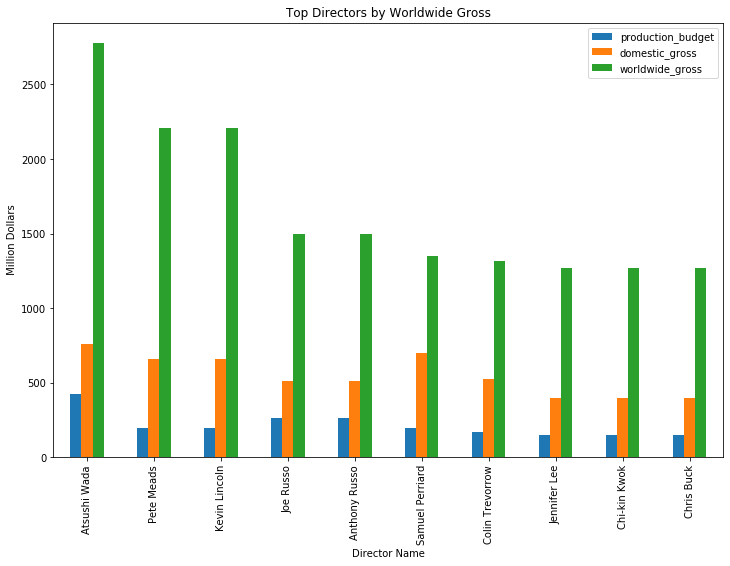

In [538]:

top_directors.plot(kind='bar', figsize=(12,8))
plt.title("Top Directors by Worldwide Gross")
plt.ylabel(' Million Dollars')
plt.xlabel("Director Name")
top_directors.index = top_directors.index.rename("director_name")

## Top Writers by Budgets

In [539]:
df_writers

,primary_name,title,language,production_budget,domestic_gross,worldwide_gross
nm0000041,Akira Kurosawa,The Magnificent Seven,NaN,90.0,93.432655,162.525156
nm0000092,John Cleese,The Croods,NaN,135.0,187.168425,573.068425
nm0000095,Woody Allen,Blue Jasmine,NaN,18.0,33.404871,102.912961
nm0000095,Woody Allen,Blue Jasmine,NaN,18.0,33.404871,102.912961
nm0000095,Woody Allen,Blue Jasmine,sv,18.0,33.404871,102.912961
...,...,...,...,...,...,...
NaN,NaN,Yes,NaN,1.7,0.396035,0.661221
NaN,NaN,Yes,fr,1.7,0.396035,0.661221
NaN,NaN,Yes,fr,1.7,0.396035,0.661221
NaN,NaN,Yes,NaN,1.7,0.396035,0.661221


Text(0.5, 0, 'Writer Name')

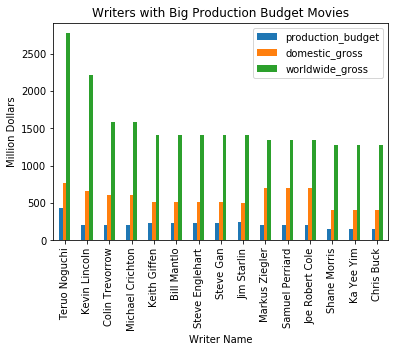

In [540]:
# Sort rows by production_budget
top_writers = df_writers.sort_values(by='worldwide_gross', ascending=False)

# Set the index to be 'primary_name', aka, the writer's name. 
top_writers = top_writers.set_index('primary_name')

# Rename the index 'writers_name'
top_writers.index = top_writers.index.rename('writer_name')

# Get only the columns of interest.
top_writers_budget = top_writers[['production_budget', 'domestic_gross', 'worldwide_gross']]

# Find the mean finances for each writer. Group by `level` when grouping by 
# the index and use `by` when grouping by a column.
top_writers_budget = top_writers_budget.groupby(by='writer_name').mean()

# Sort by descending production budget
top_writers_budget = top_writers_budget.sort_values(by='worldwide_gross', 
                                                    ascending=False) \

# Get the top 15 writers
top_writers_budget = top_writers_budget.head(15)

# Create a bar graph of how much money is spent on movies written by the writer

fig = top_writers_budget.plot(kind='bar')
fig.set_title("Writers with Big Production Budget Movies")
fig.set_ylabel('Million Dollars')
fig.set_xlabel("Writer Name")

## Top Genres by Budgets

In [541]:
df_tn_movie_budgets.head(5)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425.0,760.507625,2776.345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410.6,241.063875,1045.663875
3,"Jun 7, 2019",Dark Phoenix,350.0,42.762350,149.762350
4,"May 1, 2015",Avengers: Age of Ultron,330.6,459.005868,1403.013963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317.0,620.181382,1316.721747


In [542]:
# 1. Set df_imdb_title_basics index to primary_title
column_list = ["original_title", "genres", "production_budget", "domestic_gross", "worldwide_gross"]
df_imdb_title_basics_index_primary_title = df_imdb_title_basics.set_index("primary_title")

# 2. Set df_tn_movie_budgets index to movie
df_tn_movie_budgets_index_movie = df_tn_movie_budgets.set_index("movie")

# 3. join tables together by indexes and select only columns of interest
df_genres = df_imdb_title_basics_index_primary_title \
                        .join(df_tn_movie_budgets_index_movie, how = 'inner')[column_list]

# 4. split genres into a list
df_genres["genres"]=df_genres["genres"].str.split(',')

# 5. Explode genres
df_genres = df_genres.explode("genres")

# 6. Replace df_ with a permanent name 
df_genres = df_genres.groupby(['genres']).mean().sort_values(by = "worldwide_gross", ascending=False)


In [543]:
df_top_genres = df_genres.head(20)
df_top_genres

,production_budget,domestic_gross,worldwide_gross
genres,,,
Musical,47.987455,138.218151,327.697746
Fantasy,51.637115,98.324332,241.815556
Adventure,69.366544,77.416612,207.711966
Animation,51.685835,70.424704,174.336356
Sci-Fi,47.110746,59.829234,153.185639
Family,43.572866,62.535158,148.529781
History,45.101335,50.251706,119.962700
Action,46.910460,45.564617,114.655051
Documentary,36.090774,42.911694,100.567788


Text(0.5, 0, 'Genres')

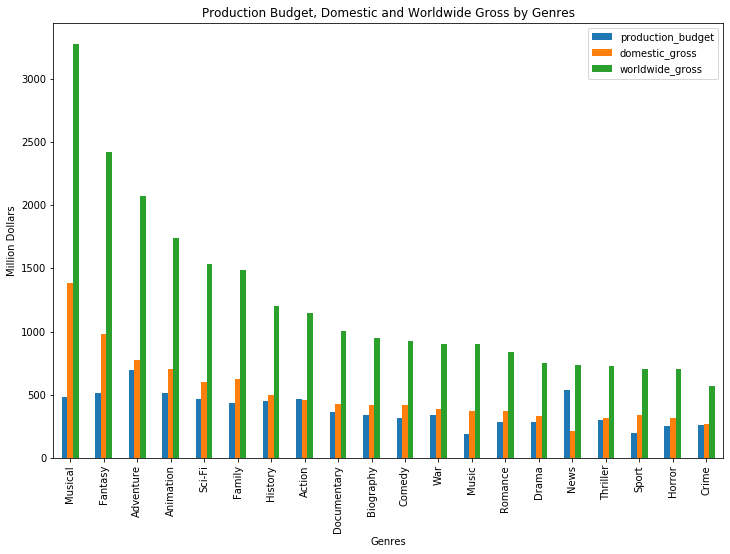

In [544]:
fig = (10*df_top_genres).plot(kind ='bar', figsize = (12,8))
fig.set_title("Production Budget, Domestic and Worldwide Gross by Genres")
fig.set_ylabel('Million Dollars')
fig.set_xlabel("Genres")

### Genres with Highest Percent Profit

Text(0, 0.5, 'Million Dollars')

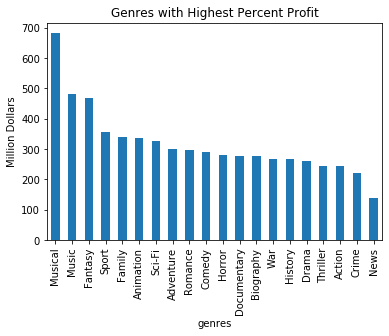

In [545]:
fig = (100*df_top_genres['worldwide_gross']/df_top_genres['production_budget']).sort_values(ascending=False).plot(kind='bar')
fig.set_title("Genres with Highest Percent Profit")
fig.set_ylabel('Million Dollars')

In [546]:
df_top_genres

,production_budget,domestic_gross,worldwide_gross
genres,,,
Musical,47.987455,138.218151,327.697746
Fantasy,51.637115,98.324332,241.815556
Adventure,69.366544,77.416612,207.711966
Animation,51.685835,70.424704,174.336356
Sci-Fi,47.110746,59.829234,153.185639
Family,43.572866,62.535158,148.529781
History,45.101335,50.251706,119.962700
Action,46.910460,45.564617,114.655051
Documentary,36.090774,42.911694,100.567788


Text(0.5, 0, 'Genres')

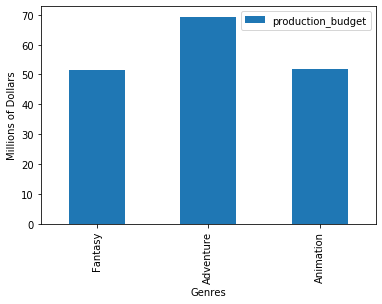

In [551]:
df_top_genres.iloc[1:4][["production_budget"]].plot(kind = "bar")
plt.ylabel("Millions of Dollars")
plt.xlabel("Genres")

## Display of Data Set with Boxplots

Text(0, 0.5, 'Dollars (Million)')

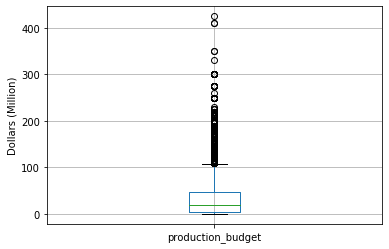

In [548]:
bp = df_movies.boxplot('production_budget')
bp.set_ylabel("Dollars (Million)")


Text(0, 0.5, 'Dollars (Million)')

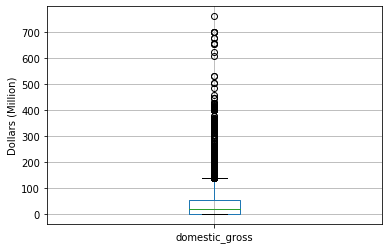

In [549]:
df_ = df_movies
bp = df_.boxplot('domestic_gross')
bp.set_ylabel("Dollars (Million)")

Text(0, 0.5, 'Dollars (Million)')

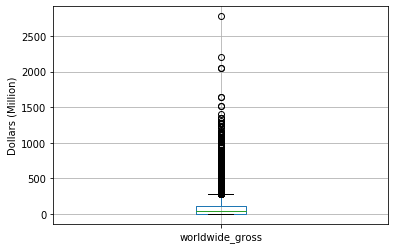

In [550]:
df_ = df_movies

bp = df_.boxplot('worldwide_gross')
bp.set_ylabel("Dollars (Million)")

# Conclusion: 

## Top Movie Genres: Fantasy, Adventure, Animation 
## Top Directors: Atsushi Wada, Pete Meads, Kevin Lincoln
## Top Writers: Teruo Noguchi, Kevin Lincoln, Colin Trevorrow 